# Importing Libraries and Loading the file

In [17]:
import numpy as np
import pandas as pd

In [2]:
# Load the file
file_path = 'Unemployment Rate.xlsx'
data = pd.read_excel(file_path)

# Data Analysis and Preprocessing

In [3]:
# Clean the data by selecting relevant columns
cleaned_data = data[['Observation Date', 'Unemployment Rate']]

# Convert the 'Observation Date' column to datetime format using .loc to avoid the warning
cleaned_data.loc[:, 'Observation Date'] = pd.to_datetime(cleaned_data['Observation Date'])

# Set the 'Observation Date' column as the index
cleaned_data.set_index('Observation Date', inplace=True)

In [4]:
# Check for missing data
missing_data = cleaned_data.isnull().sum()

# Display the missing data information
missing_data.head()

Unemployment Rate    0
dtype: int64

In [5]:
# Perform basic analysis: Summary statistics and plot
summary_stats = cleaned_data.describe()

In [6]:
summary_stats

,Unemployment Rate
count,799.000000
mean,5.865957
std,1.685733
min,3.400000
25%,4.600000
50%,5.600000
75%,6.900000
max,14.800000


# Data Plotting

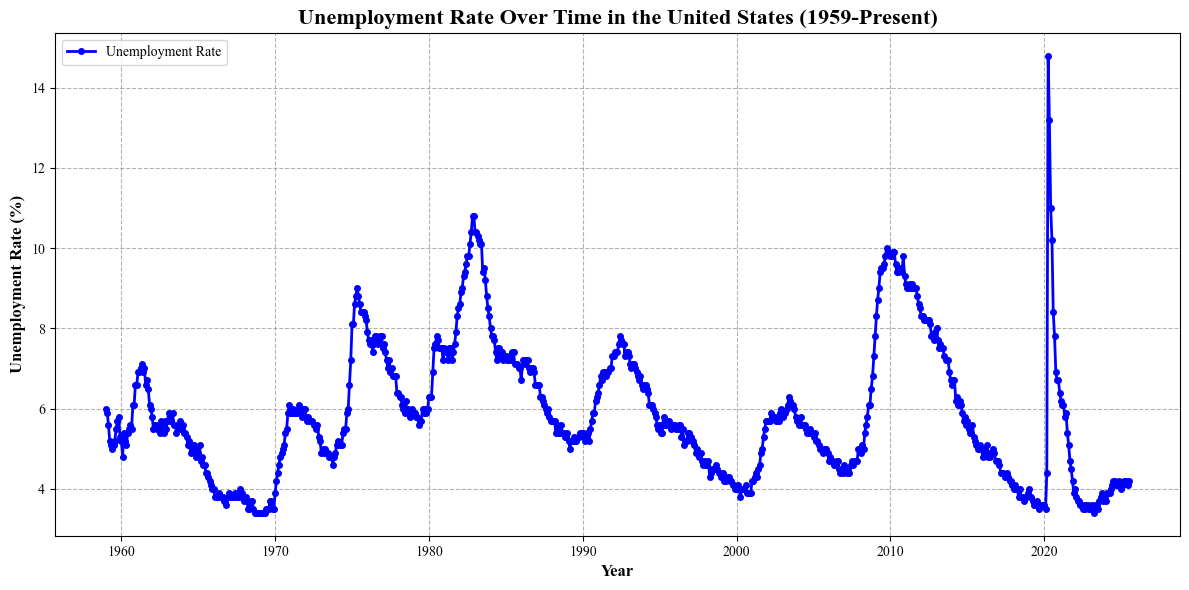

In [7]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Plot the unemployment rate over time with professional styling
plt.figure(figsize=(12, 6))

# Plot with a line and markers for better visibility
plt.plot(cleaned_data.index, cleaned_data['Unemployment Rate'], label='Unemployment Rate', color='b', marker='o', markersize=4, linestyle='-', linewidth=2)

# Add title 
plt.title('Unemployment Rate Over Time in the United States (1959-Present)', fontsize=16, fontweight='bold', family='Times New Roman')

# Add labels 
plt.xlabel('Year', fontsize=12, fontweight='bold', family='Times New Roman')
plt.ylabel('Unemployment Rate (%)', fontsize=12, fontweight='bold', family='Times New Roman')

# Add grid 
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Customize tick marks and labels 
plt.xticks(fontsize=10, family='Times New Roman')
plt.yticks(fontsize=10, family='Times New Roman')

# Adding a legend 
plt.legend(loc='upper left', fontsize=10, prop={'family': 'Times New Roman'})

# Make layout tight to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Stochastic Properties and Pre-testing

# ACF, PACF, and ADF Test

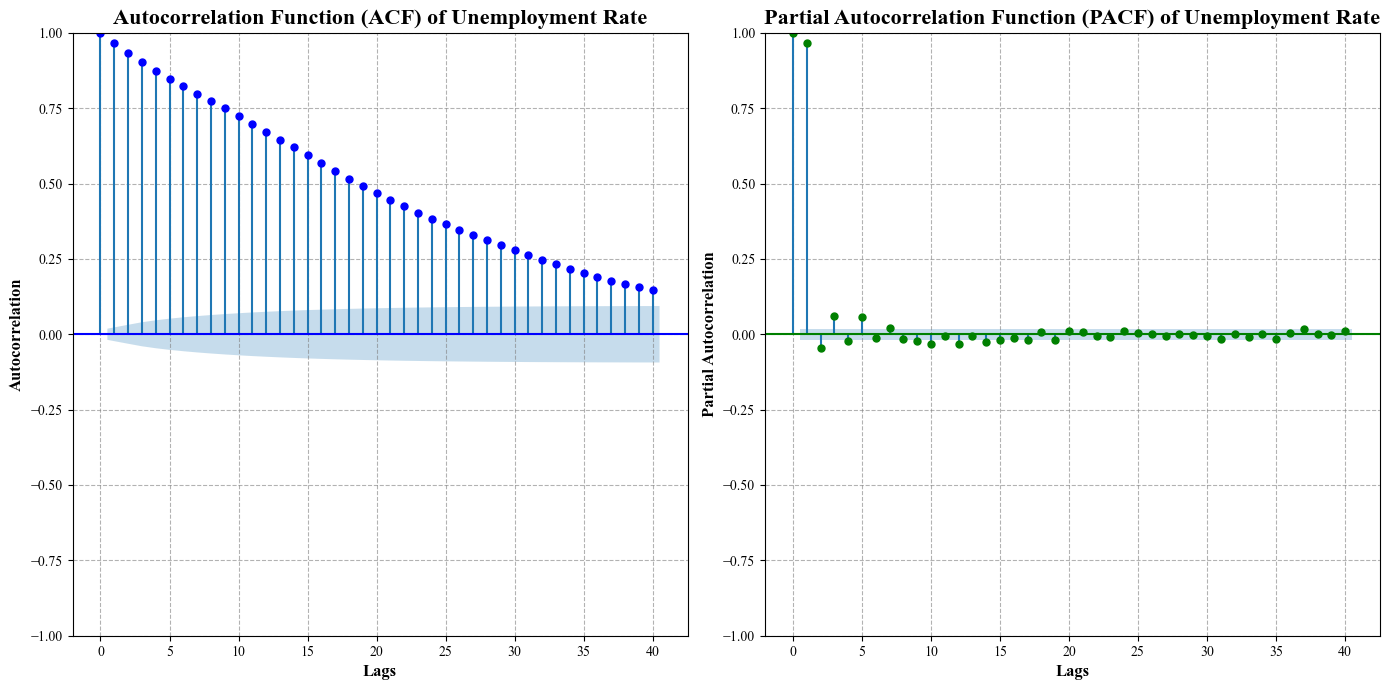

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams

rcParams['font.family'] = 'Times New Roman'

# Plot ACF and PACF 
plt.figure(figsize=(14, 7))

# Plot ACF
plt.subplot(121)
plot_acf(cleaned_data['Unemployment Rate'], lags=40, ax=plt.gca(), color='b', alpha=0.6)
plt.title('Autocorrelation Function (ACF) of Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Plot PACF
plt.subplot(122)
plot_pacf(cleaned_data['Unemployment Rate'], lags=40, ax=plt.gca(), color='g', alpha=0.6)
plt.title('Partial Autocorrelation Function (PACF) of Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Partial Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

plt.tight_layout()
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller
df_cleaned = cleaned_data

# Perform the Augmented Dickey-Fuller test on the 'Unemployment Rate' series
adf_result = adfuller(df_cleaned['Unemployment Rate'])

# Extract the ADF results
adf_statistic = adf_result[0]
adf_p_value = adf_result[1]
adf_critical_values = adf_result[4]

# Display the ADF result 
print("Augmented Dickey-Fuller Test Results")
print("-" * 50)
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_p_value:.4f}")
print("\nCritical Values:")
for key, value in adf_critical_values.items():
    print(f"  {key}: {value:.4f}")
print("-" * 50)

# Interpret the result
if adf_p_value < 0.05:
    print("Conclusion: The series is likely stationary (reject the null hypothesis).")
else:
    print("Conclusion: The series is likely non-stationary (fail to reject the null hypothesis).")


Augmented Dickey-Fuller Test Results
--------------------------------------------------
ADF Statistic: -3.4190
P-value: 0.0103

Critical Values:
  1%: -3.4386
  5%: -2.8652
  10%: -2.5687
--------------------------------------------------
Conclusion: The series is likely stationary (reject the null hypothesis).


# Find Optimal AR Lag Using AIC and BIC

AIC and BIC Values for Different Lags
--------------------------------------------------
Lag 1: AIC = 903.3690, BIC = 917.4153
Lag 2: AIC = 903.5756, BIC = 922.2990
Lag 3: AIC = 902.1241, BIC = 925.5221
Lag 4: AIC = 902.7098, BIC = 930.7798
Lag 5: AIC = 901.7532, BIC = 934.4928
Lag 6: AIC = 903.4163, BIC = 940.8229
Lag 7: AIC = 904.8193, BIC = 946.8903
Lag 8: AIC = 906.5116, BIC = 953.2445
Lag 9: AIC = 907.5775, BIC = 958.9698
Lag 10: AIC = 908.4611, BIC = 964.5103
Lag 11: AIC = 910.2175, BIC = 970.9210
Lag 12: AIC = 909.8533, BIC = 975.2085
Lag 13: AIC = 911.6984, BIC = 981.7028
Lag 14: AIC = 912.0701, BIC = 986.7210
Lag 15: AIC = 911.5471, BIC = 990.8420
Lag 16: AIC = 912.8240, BIC = 996.7603
Lag 17: AIC = 914.4368, BIC = 1003.0121
Lag 18: AIC = 916.0308, BIC = 1009.2423
Lag 19: AIC = 917.6426, BIC = 1015.4878
Lag 20: AIC = 919.3997, BIC = 1021.8759
--------------------------------------------------
Optimal lag based on AIC: 5
Optimal lag based on BIC: 1


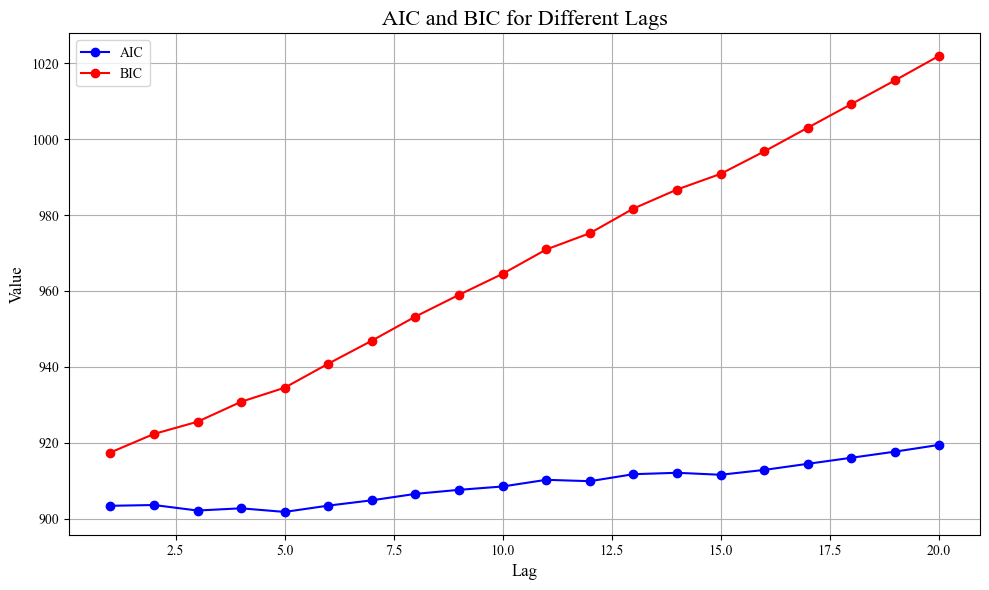

In [21]:
from statsmodels.tsa.ar_model import AutoReg

# Set the frequency to monthly (MS - Month Start) if data is monthly
df_cleaned = df_cleaned.asfreq('MS')

# Max lag to check
max_lag = 20  

# Store the AIC and BIC values for each lag
aic_values = []
bic_values = []
lags = list(range(1, max_lag + 1))

# Loop over different lags and fit the AR model
for lag in lags:
    model = AutoReg(df_cleaned['Unemployment Rate'], lags=lag)
    ar_model_fitted = model.fit()
    
    # Store the AIC and BIC values for each lag
    aic_values.append(ar_model_fitted.aic)
    bic_values.append(ar_model_fitted.bic)

# Find the lag with the lowest AIC and BIC
optimal_aic_lag = lags[np.argmin(aic_values)]
optimal_bic_lag = lags[np.argmin(bic_values)]

# Print AIC and BIC values for each lag
print("AIC and BIC Values for Different Lags")
print("-" * 50)
for lag, aic, bic in zip(lags, aic_values, bic_values):
    print(f"Lag {lag}: AIC = {aic:.4f}, BIC = {bic:.4f}")

# Print the optimal lags based on AIC and BIC
print("-" * 50)
print(f"Optimal lag based on AIC: {optimal_aic_lag}")
print(f"Optimal lag based on BIC: {optimal_bic_lag}")

# Plot the AIC and BIC values for each lag
plt.figure(figsize=(10, 6))
plt.plot(lags, aic_values, label='AIC', color='b', marker='o')
plt.plot(lags, bic_values, label='BIC', color='r', marker='o')
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('AIC and BIC for Different Lags', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# AutoReg


AR-5 Model Summary
                            AutoReg Model Results                             
Dep. Variable:      Unemployment Rate   No. Observations:                  799
Model:                     AutoReg(5)   Log Likelihood                -443.877
Method:               Conditional MLE   S.D. of innovations              0.423
Date:                Tue, 30 Dec 2025   AIC                            901.753
Time:                        16:50:04   BIC                            934.493
Sample:                    06-01-1959   HQIC                           914.335
                         - 07-01-2025                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1740      0.056      3.104      0.002       0.064       0.284
Unemployment Rate.L1     1.0160      0.035     28.680      0.000       0.947     

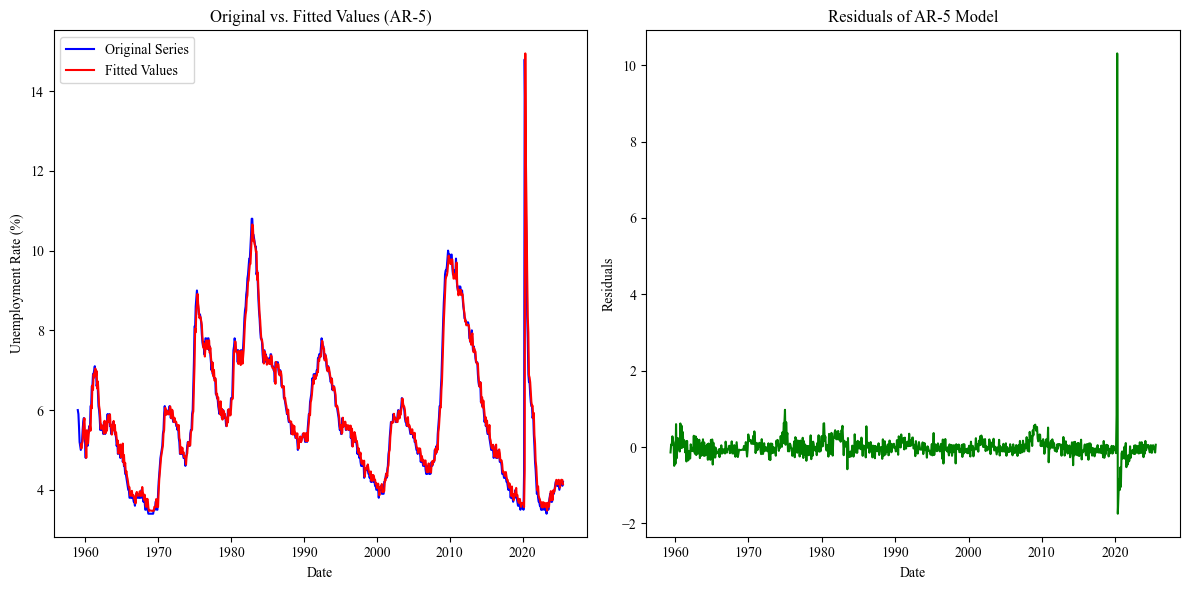

Root Mean Squared Error (RMSE) of AR-5 Model: 0.4232


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tools.eval_measures import rmse
import numpy as np

# Assuming 'df_cleaned' contains the 'Unemployment Rate' data
# Set the frequency of the 'Observation Date' index (assuming monthly data)
df_cleaned = cleaned_data  # if 'cleaned_data' is already defined

# Set the frequency to monthly (MS - Month Start) if data is monthly
df_cleaned = df_cleaned.asfreq('MS')

# Fit the Auto-Regressive (AR) model with the optimal lag
optimal_lag = optimal_aic_lag  # Or use optimal_bic_lag if you prefer

# Fit the AR model
model = AutoReg(df_cleaned['Unemployment Rate'], lags=optimal_lag)
ar_model_fitted = model.fit()

# Print the AR model summary
print(f"\nAR-{optimal_lag} Model Summary")
print(ar_model_fitted.summary())

# Adjust the index to match the fitted values
fitted_values = ar_model_fitted.fittedvalues

# Plot the original series and the fitted values
plt.figure(figsize=(12, 6))

# Plot the original vs. fitted values
plt.subplot(121)
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate'], label='Original Series', color='blue')
plt.plot(df_cleaned.index[optimal_lag:], fitted_values, label='Fitted Values', color='red')  # Aligning the fitted values
plt.title(f'Original vs. Fitted Values (AR-{optimal_lag})')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='upper left')

# Plot the residuals
plt.subplot(122)
plt.plot(df_cleaned.index[optimal_lag:], ar_model_fitted.resid, color='green')  # Residuals after lag
plt.title(f'Residuals of AR-{optimal_lag} Model')
plt.xlabel('Date')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Calculate the RMSE of the model
ar_rmse = rmse(df_cleaned['Unemployment Rate'][optimal_lag:], fitted_values)
print(f"Root Mean Squared Error (RMSE) of AR-{optimal_lag} Model: {ar_rmse:.4f}")


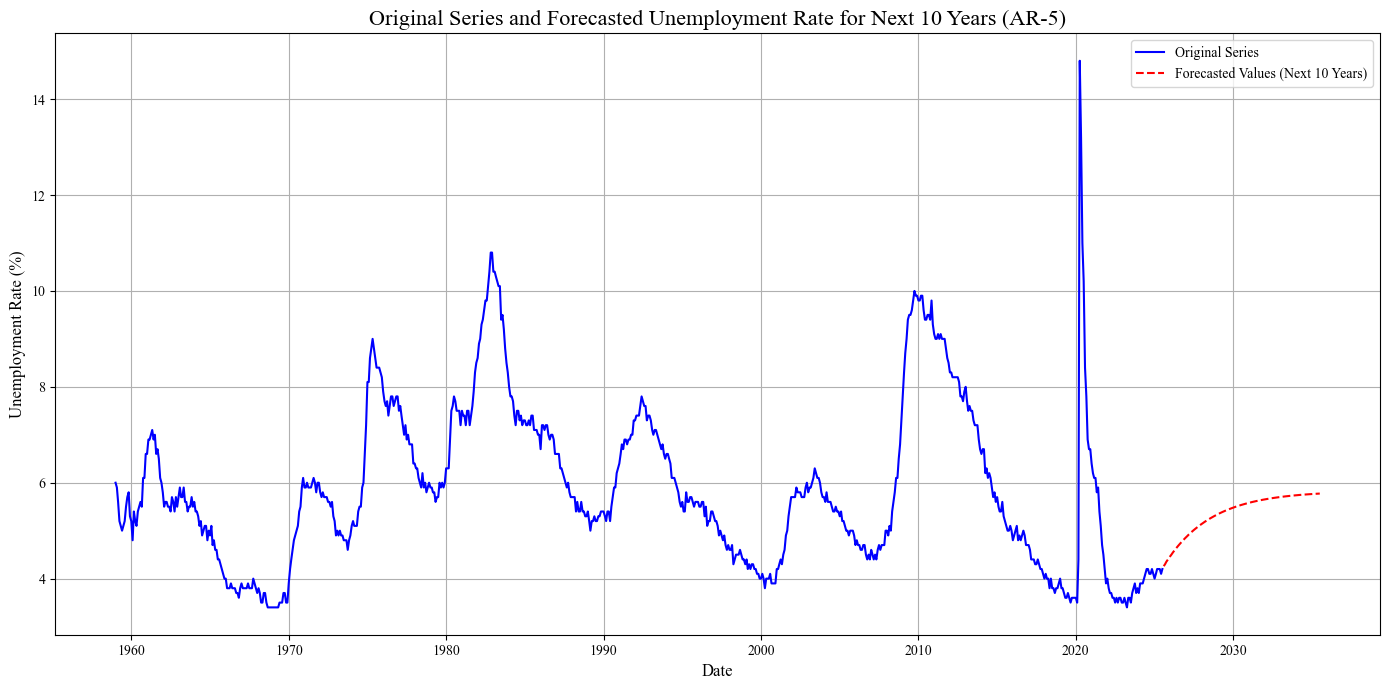

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

# Assuming 'df_cleaned' contains the 'Unemployment Rate' data
# Set the frequency to monthly (MS - Month Start) if data is monthly
df_cleaned = cleaned_data  # if 'cleaned_data' is already defined
df_cleaned = df_cleaned.asfreq('MS')

# Fit the Auto-Regressive (AR) model with the optimal lag
optimal_lag = optimal_aic_lag  # Or use optimal_bic_lag if you prefer

# Fit the AR model
model = AutoReg(df_cleaned['Unemployment Rate'], lags=optimal_lag)
ar_model_fitted = model.fit()

# Predict for the next 10 years (120 months)
forecast_steps = 120
forecast = ar_model_fitted.predict(start=len(df_cleaned), end=len(df_cleaned) + forecast_steps - 1)

# Create a new time index for the forecasted period
forecast_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='MS')

# Combine the original series and the forecasted values
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the original data and the forecasted values
plt.figure(figsize=(14, 7))

# Plot original data
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate'], label='Original Series', color='blue')

# Plot forecasted data
plt.plot(forecast_series.index, forecast_series, label='Forecasted Values (Next 10 Years)', color='red', linestyle='--')

# Title and labels
plt.title(f'Original Series and Forecasted Unemployment Rate for Next 10 Years (AR-{optimal_lag})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()



AR-5 Model Summary
                            AutoReg Model Results                             
Dep. Variable:      Unemployment Rate   No. Observations:                  799
Model:                     AutoReg(5)   Log Likelihood                -443.877
Method:               Conditional MLE   S.D. of innovations              0.423
Date:                Tue, 30 Dec 2025   AIC                            901.753
Time:                        17:34:29   BIC                            934.493
Sample:                    06-01-1959   HQIC                           914.335
                         - 07-01-2025                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1740      0.056      3.104      0.002       0.064       0.284
Unemployment Rate.L1     1.0160      0.035     28.680      0.000       0.947     

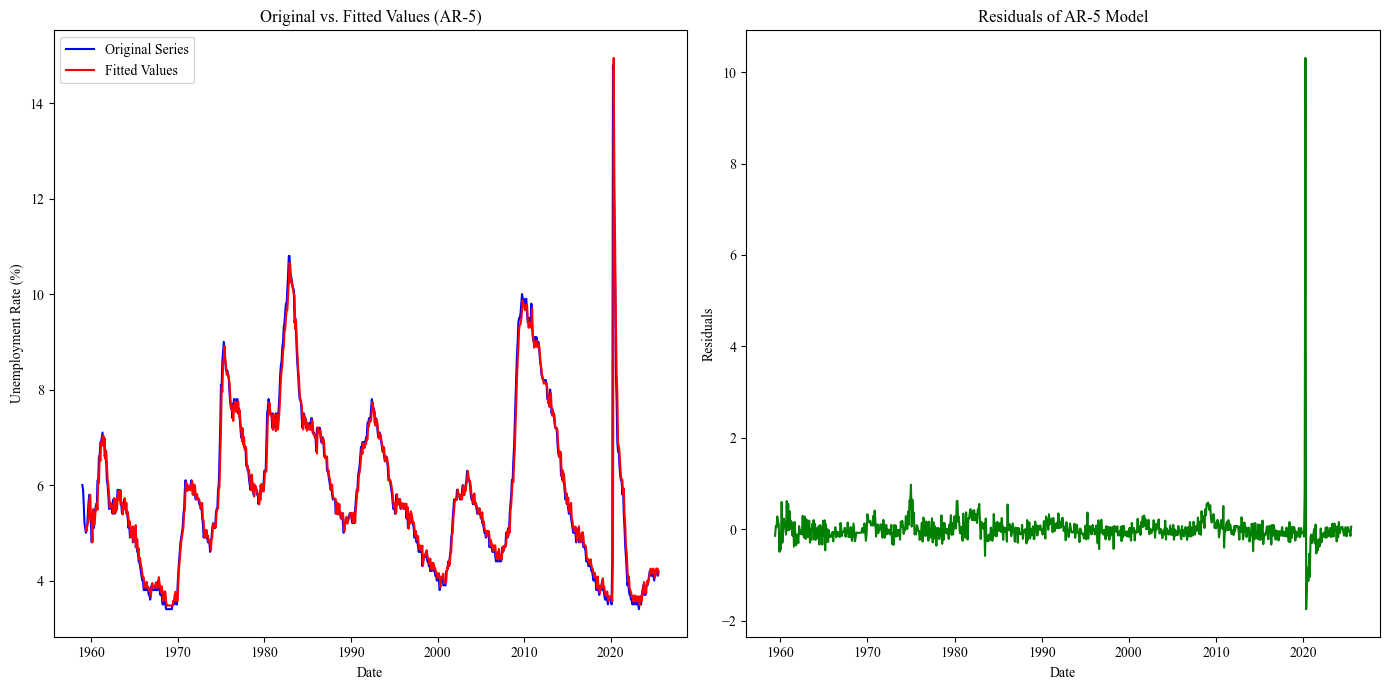

Root Mean Squared Error (RMSE) of AR-5 Model: 0.4232


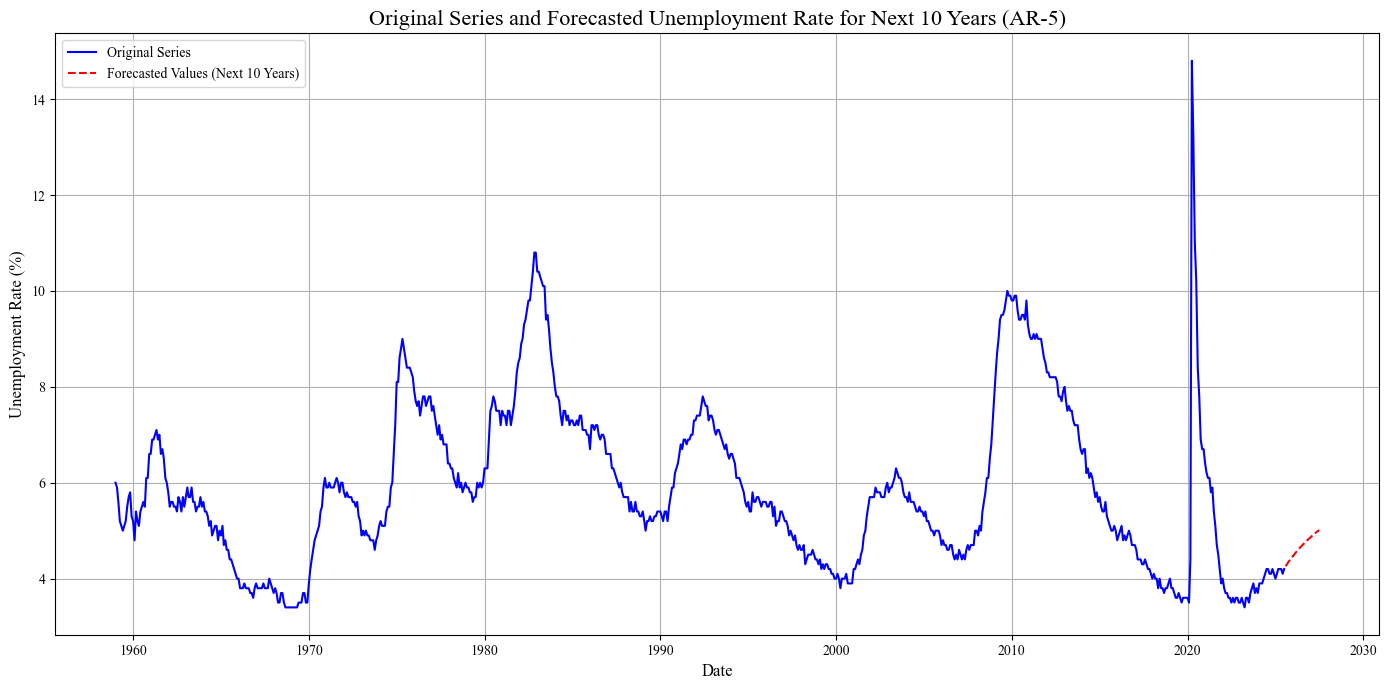

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tools.eval_measures import rmse
import numpy as np

# Assuming 'df_cleaned' contains the 'Unemployment Rate' data
# Set the frequency to monthly (MS - Month Start) if data is monthly
df_cleaned = cleaned_data  # if 'cleaned_data' is already defined
df_cleaned = df_cleaned.asfreq('MS')

# Fit the Auto-Regressive (AR) model with the optimal lag
optimal_lag = optimal_aic_lag  # Or use optimal_bic_lag if you prefer

# Fit the AR model
model = AutoReg(df_cleaned['Unemployment Rate'], lags=optimal_lag)
ar_model_fitted = model.fit()

# Print the AR model summary
print(f"\nAR-{optimal_lag} Model Summary")
print(ar_model_fitted.summary())

# Adjust the index to match the fitted values
fitted_values = ar_model_fitted.fittedvalues

# Plot the original series and the fitted values
plt.figure(figsize=(14, 7))

# Plot the original vs. fitted values
plt.subplot(121)
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate'], label='Original Series', color='blue')
plt.plot(df_cleaned.index[optimal_lag:], fitted_values, label='Fitted Values', color='red')  # Aligning the fitted values
plt.title(f'Original vs. Fitted Values (AR-{optimal_lag})')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='upper left')

# Plot the residuals
plt.subplot(122)
plt.plot(df_cleaned.index[optimal_lag:], ar_model_fitted.resid, color='green')  # Residuals after lag
plt.title(f'Residuals of AR-{optimal_lag} Model')
plt.xlabel('Date')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Calculate the RMSE of the model
ar_rmse = rmse(df_cleaned['Unemployment Rate'][optimal_lag:], fitted_values)
print(f"Root Mean Squared Error (RMSE) of AR-{optimal_lag} Model: {ar_rmse:.4f}")

# Predict for the next 10 years (120 months)
forecast_steps = 24
forecast = ar_model_fitted.predict(start=len(df_cleaned), end=len(df_cleaned) + forecast_steps - 1)

# Create a new time index for the forecasted period
forecast_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='MS')

# Combine the original series and the forecasted values
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the original data and the forecasted values
plt.figure(figsize=(14, 7))

# Plot original data
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate'], label='Original Series', color='blue')

# Plot forecasted data
plt.plot(forecast_series.index, forecast_series, label='Forecasted Values (Next 10 Years)', color='red', linestyle='--')

# Title and labels
plt.title(f'Original Series and Forecasted Unemployment Rate for Next 10 Years (AR-{optimal_lag})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'df_cleaned' contains the original data and 'ar_model_fitted' is the fitted AR model
# Assuming the original data and the fitted values are aligned

# Actual values (original data)
actual_values = df_cleaned['Unemployment Rate'][optimal_lag:]  # Starting from the lag to match the fitted values

# Fitted values from the AR model
fitted_values = ar_model_fitted.fittedvalues

# Calculate MSE
mse = mean_squared_error(actual_values, fitted_values)
print(f'MSE (Mean Squared Error): {mse:.4f}')

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f'RMSE (Root Mean Squared Error): {rmse:.4f}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_values, fitted_values)
print(f'MAE (Mean Absolute Error): {mae:.4f}')

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
print(f'MAPE (Mean Absolute Percentage Error): {mape:.4f}%')

# Optionally, calculate the metrics for the forecasted data:
# Actual values for comparison (should be the original series data)
forecast_values = ar_model_fitted.predict(start=len(df_cleaned), end=len(df_cleaned) + 120 - 1)

# Create a new time index for the forecasted period
forecast_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=120, freq='MS')

# Create forecast series (you could replace this with your future forecast values if you have them)
forecast_series = pd.Series(forecast_values, index=forecast_index)

# For MAPE, use actual values and forecasted values for the next 10 years:
# Assuming future actual values are unknown, we will only use fitted for now
# print the metrics for forecast prediction if actual data is available in the future



MSE (Mean Squared Error): 0.1791
RMSE (Root Mean Squared Error): 0.4232
MAE (Mean Absolute Error): 0.1617
MAPE (Mean Absolute Percentage Error): 2.6602%



AR-5 Model Summary
                            AutoReg Model Results                             
Dep. Variable:      Unemployment Rate   No. Observations:                  799
Model:                     AutoReg(5)   Log Likelihood                -443.877
Method:               Conditional MLE   S.D. of innovations              0.423
Date:                Tue, 30 Dec 2025   AIC                            901.753
Time:                        17:16:25   BIC                            934.493
Sample:                    06-01-1959   HQIC                           914.335
                         - 07-01-2025                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1740      0.056      3.104      0.002       0.064       0.284
Unemployment Rate.L1     1.0160      0.035     28.680      0.000       0.947     

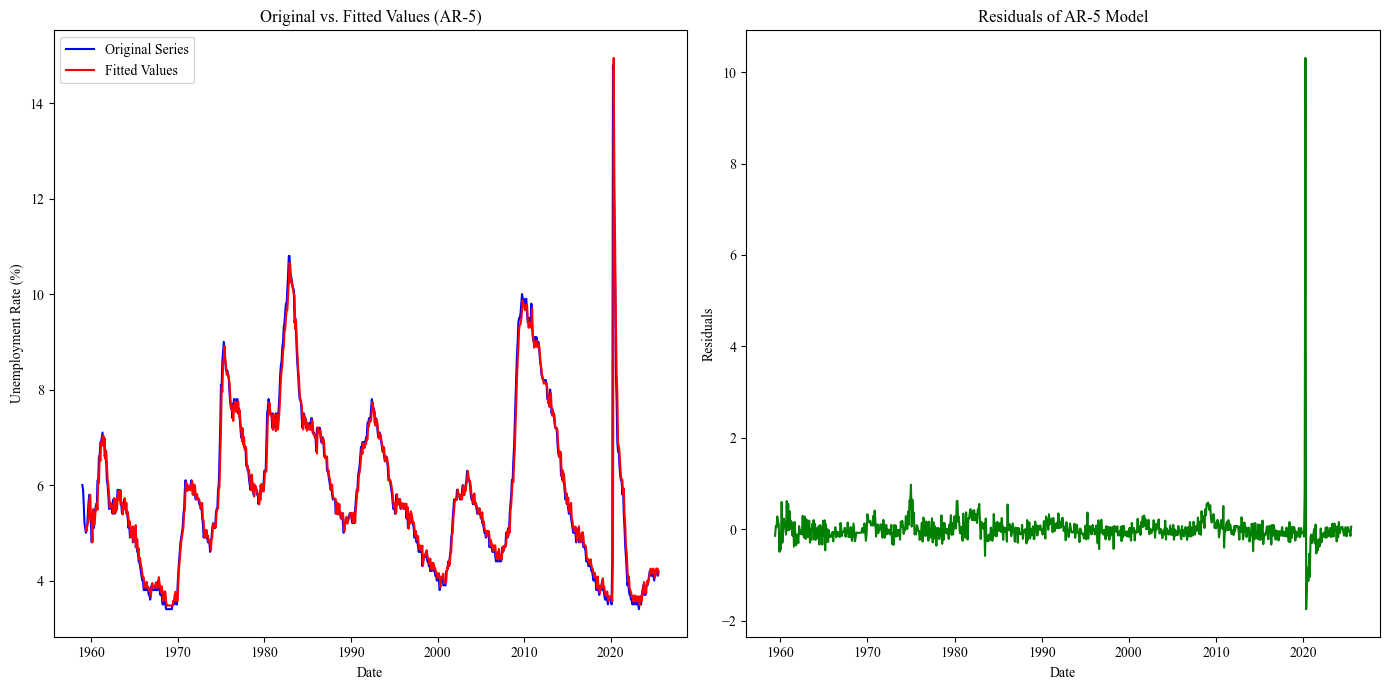

MSE (Mean Squared Error): 0.1791
RMSE (Root Mean Squared Error): 0.4232
MAE (Mean Absolute Error): 0.1617
MAPE (Mean Absolute Percentage Error): 2.6602%


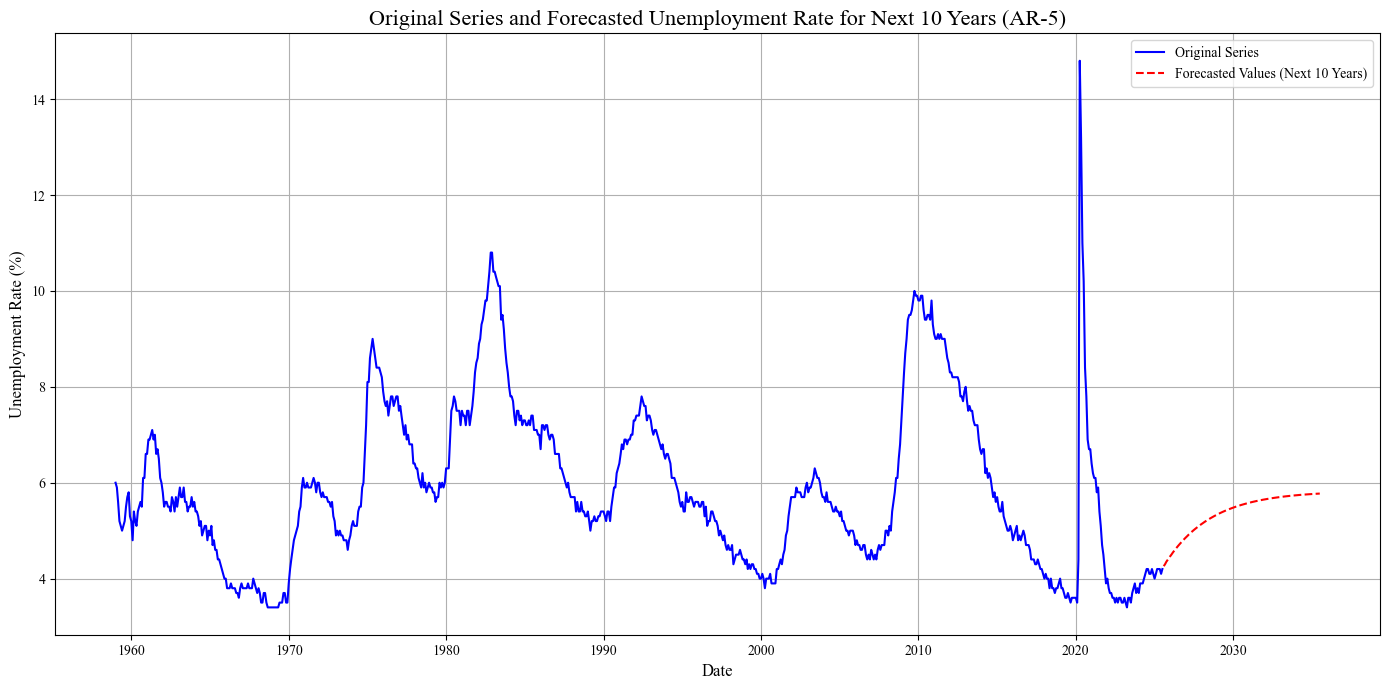

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'cleaned_data' contains the original dataset with 'Unemployment Rate' and 'Observation Date'
# Set the frequency to monthly (MS - Month Start) if data is monthly
df_cleaned = cleaned_data  # Replace with your actual cleaned data
df_cleaned = df_cleaned.asfreq('MS')  # Ensure the frequency is set to monthly

# Step 1: Fit the Auto-Regressive (AR) model with the optimal lag
optimal_lag = optimal_aic_lag  # Or use optimal_bic_lag if you prefer

# Fit the AR model
model = AutoReg(df_cleaned['Unemployment Rate'], lags=optimal_lag)
ar_model_fitted = model.fit()

# Print the AR model summary
print(f"\nAR-{optimal_lag} Model Summary")
print(ar_model_fitted.summary())

# Step 2: Calculate Fitted Values
fitted_values = ar_model_fitted.fittedvalues

# Step 3: Plot the original series and the fitted values
plt.figure(figsize=(14, 7))

# Plot the original vs. fitted values
plt.subplot(121)
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate'], label='Original Series', color='blue')
plt.plot(df_cleaned.index[optimal_lag:], fitted_values, label='Fitted Values', color='red')  # Aligning the fitted values
plt.title(f'Original vs. Fitted Values (AR-{optimal_lag})')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='upper left')

# Plot the residuals
plt.subplot(122)
plt.plot(df_cleaned.index[optimal_lag:], ar_model_fitted.resid, color='green')  # Residuals after lag
plt.title(f'Residuals of AR-{optimal_lag} Model')
plt.xlabel('Date')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Step 4: Calculate the RMSE, MSE, MAE, and MAPE

# Actual values (original data), excluding the first 'optimal_lag' data points
actual_values = df_cleaned['Unemployment Rate'][optimal_lag:]

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(actual_values, fitted_values)
print(f'MSE (Mean Squared Error): {mse:.4f}')

# Calculate RMSE (Root Mean Squared Error)
rmse_value = np.sqrt(mse)
print(f'RMSE (Root Mean Squared Error): {rmse_value:.4f}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_values, fitted_values)
print(f'MAE (Mean Absolute Error): {mae:.4f}')

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
print(f'MAPE (Mean Absolute Percentage Error): {mape:.4f}%')

# Step 5: Forecast for the next 10 years (120 months)
forecast_steps = 120
forecast = ar_model_fitted.predict(start=len(df_cleaned), end=len(df_cleaned) + forecast_steps - 1)

# Create a new time index for the forecasted period
forecast_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='MS')

# Combine the original series and the forecasted values
forecast_series = pd.Series(forecast, index=forecast_index)

# Step 6: Plot the original data and the forecasted values
plt.figure(figsize=(14, 7))

# Plot original data
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate'], label='Original Series', color='blue')

# Plot forecasted data
plt.plot(forecast_series.index, forecast_series, label='Forecasted Values (Next 10 Years)', color='red', linestyle='--')

# Title and labels
plt.title(f'Original Series and Forecasted Unemployment Rate for Next 10 Years (AR-{optimal_lag})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()



AR-5 Model Summary
                            AutoReg Model Results                             
Dep. Variable:      Unemployment Rate   No. Observations:                  639
Model:                     AutoReg(5)   Log Likelihood                 228.314
Method:               Conditional MLE   S.D. of innovations              0.169
Date:                Tue, 30 Dec 2025   AIC                           -442.628
Time:                        17:25:17   BIC                           -411.464
Sample:                    06-01-1959   HQIC                          -430.527
                         - 03-01-2012                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0785      0.027      2.955      0.003       0.026       0.131
Unemployment Rate.L1     1.0057      0.039     25.615      0.000       0.929     

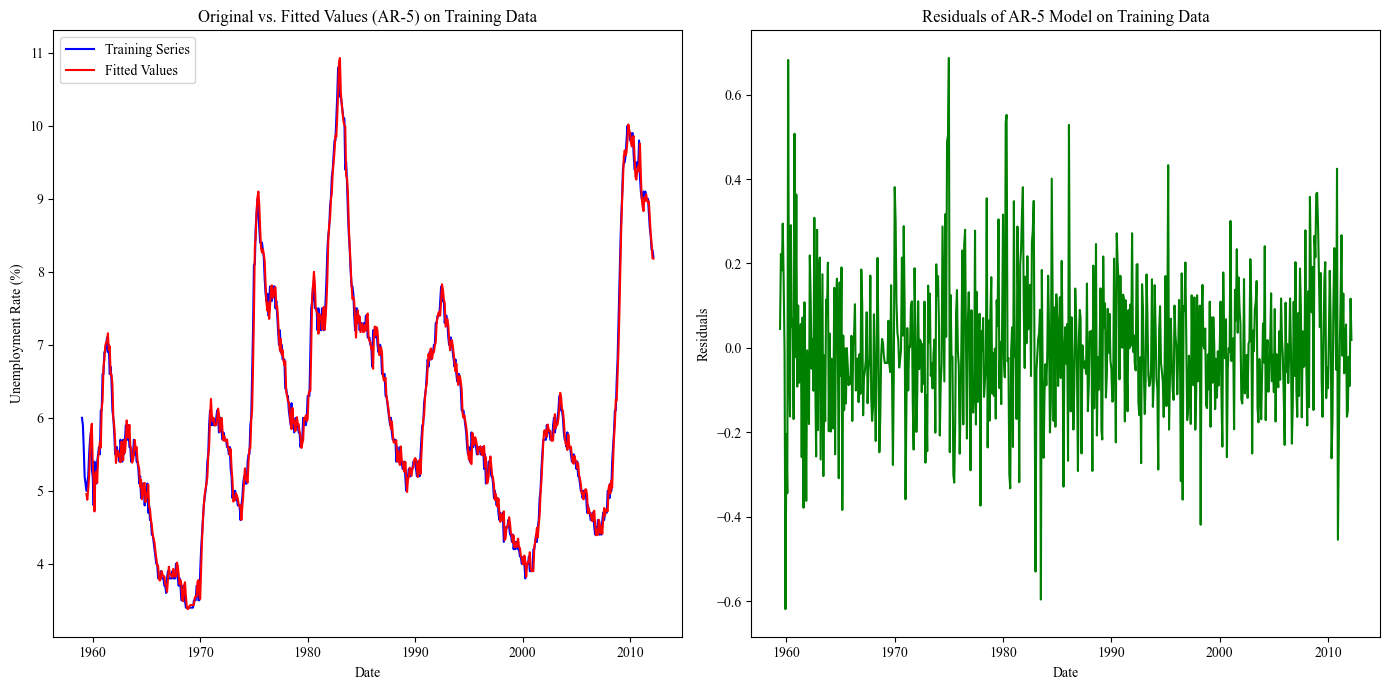

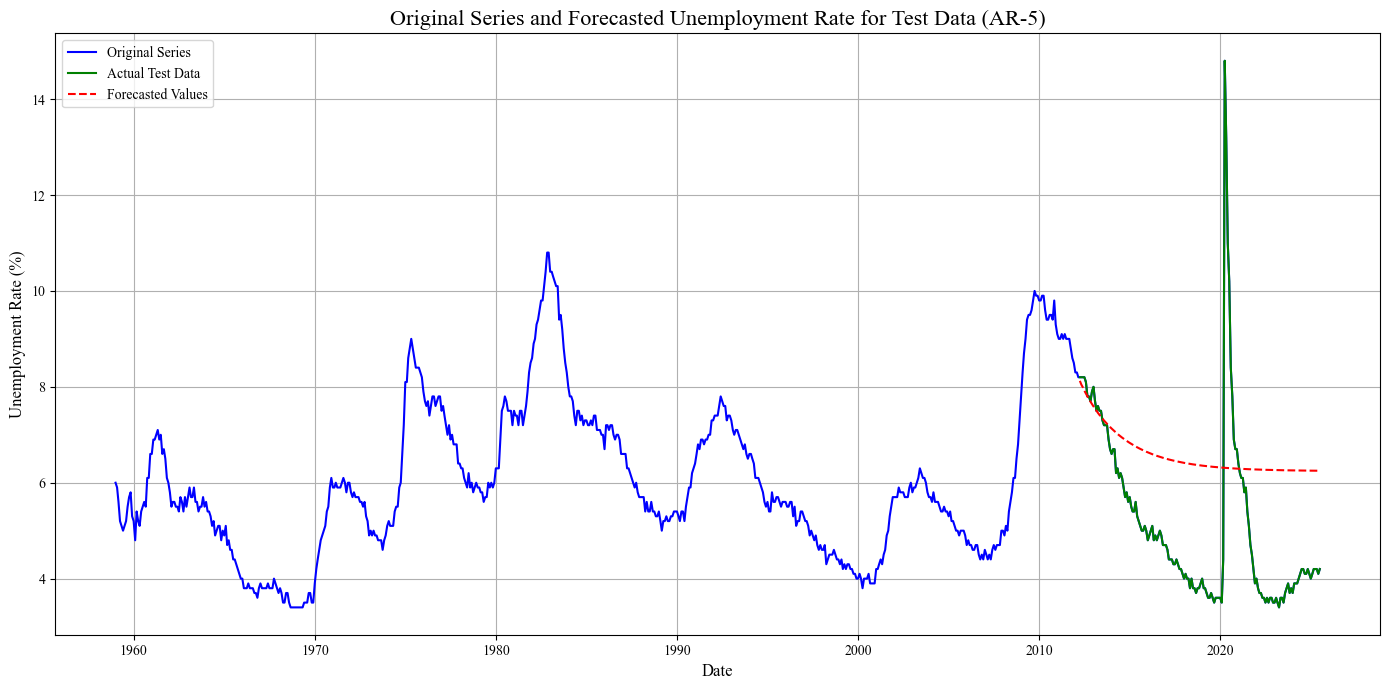

MSE (Mean Squared Error) on Test Data: 4.6358
RMSE (Root Mean Squared Error) on Test Data: 2.1531
MAE (Mean Absolute Error) on Test Data: 1.8138
MAPE (Mean Absolute Percentage Error) on Test Data: 41.5183%


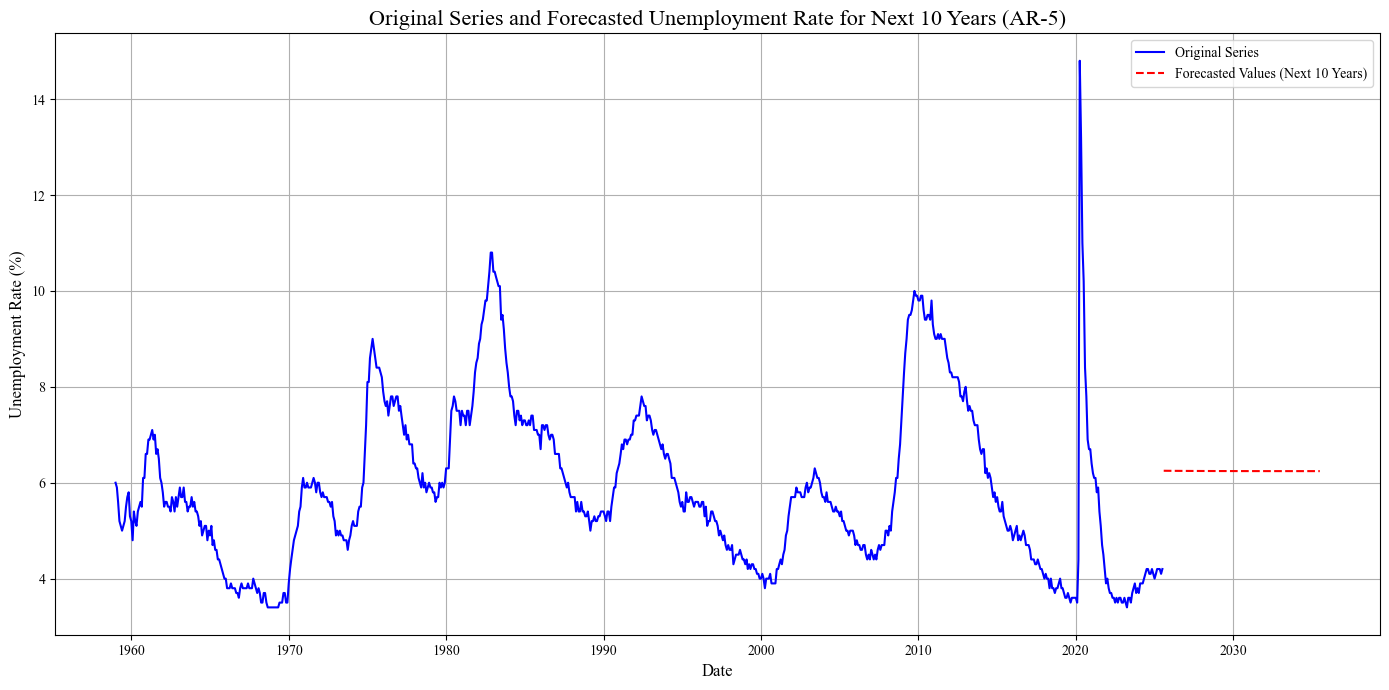

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'cleaned_data' contains the original dataset with 'Unemployment Rate' and 'Observation Date'
df_cleaned = cleaned_data  # Replace with your actual cleaned data
df_cleaned = df_cleaned.asfreq('MS')  # Ensure the frequency is set to monthly

# Step 1: Train-Test Split
train_size = int(len(df_cleaned) * 0.8)  # 80% for training, 20% for testing
train, test = df_cleaned[:train_size], df_cleaned[train_size:]

# Step 2: Fit the Auto-Regressive (AR) model with the optimal lag
optimal_lag = optimal_aic_lag  # Or use optimal_bic_lag if you prefer

# Fit the AR model on the training data
model = AutoReg(train['Unemployment Rate'], lags=optimal_lag)
ar_model_fitted = model.fit()

# Print the AR model summary
print(f"\nAR-{optimal_lag} Model Summary")
print(ar_model_fitted.summary())

# Step 3: Calculate Fitted Values
fitted_values = ar_model_fitted.fittedvalues

# Step 4: Plot the original series and the fitted values on training data
plt.figure(figsize=(14, 7))

# Plot the original vs. fitted values
plt.subplot(121)
plt.plot(train.index, train['Unemployment Rate'], label='Training Series', color='blue')
plt.plot(train.index[optimal_lag:], fitted_values, label='Fitted Values', color='red')  # Aligning the fitted values
plt.title(f'Original vs. Fitted Values (AR-{optimal_lag}) on Training Data')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='upper left')

# Plot the residuals
plt.subplot(122)
plt.plot(train.index[optimal_lag:], ar_model_fitted.resid, color='green')  # Residuals after lag
plt.title(f'Residuals of AR-{optimal_lag} Model on Training Data')
plt.xlabel('Date')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Step 5: Forecast on Test Data
# Forecast using the fitted model on the test data (next 20% of the data)
forecast_steps = len(test)
forecast = ar_model_fitted.predict(start=len(train), end=len(train) + forecast_steps - 1)

# Actual values (test data)
actual_values = test['Unemployment Rate']

# Step 6: Plot the forecasted vs actual values
plt.figure(figsize=(14, 7))

# Plot original and test data
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate'], label='Original Series', color='blue')
plt.plot(test.index, actual_values, label='Actual Test Data', color='green')
plt.plot(test.index, forecast, label='Forecasted Values', color='red', linestyle='--')

# Title and labels
plt.title(f'Original Series and Forecasted Unemployment Rate for Test Data (AR-{optimal_lag})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Calculate the RMSE, MSE, MAE, and MAPE on Test Data
# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(actual_values, forecast)
print(f'MSE (Mean Squared Error) on Test Data: {mse:.4f}')

# Calculate RMSE (Root Mean Squared Error)
rmse_value = np.sqrt(mse)
print(f'RMSE (Root Mean Squared Error) on Test Data: {rmse_value:.4f}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_values, forecast)
print(f'MAE (Mean Absolute Error) on Test Data: {mae:.4f}')

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100
print(f'MAPE (Mean Absolute Percentage Error) on Test Data: {mape:.4f}%')

# Step 8: Forecast for the next 10 years (120 months)
forecast_steps = 120
forecast = ar_model_fitted.predict(start=len(df_cleaned), end=len(df_cleaned) + forecast_steps - 1)

# Create a new time index for the forecasted period
forecast_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='MS')

# Combine the original series and the forecasted values
forecast_series = pd.Series(forecast, index=forecast_index)

# Step 9: Plot the original data and the forecasted values
plt.figure(figsize=(14, 7))

# Plot original data
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate'], label='Original Series', color='blue')

# Plot forecasted data
plt.plot(forecast_series.index, forecast_series, label='Forecasted Values (Next 10 Years)', color='red', linestyle='--')

# Title and labels
plt.title(f'Original Series and Forecasted Unemployment Rate for Next 10 Years (AR-{optimal_lag})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
